In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
import sklearn
print(sklearn.__version__)

1.1.3


In [4]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame (boston.data, columns=boston.feature_names)
y = boston.target

c:\Users\crmso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [5]:
df = df[['RM']] # Note: returns df comparing to  df['RM']
df['target'] = y

In [6]:
print (df.head(10))
df.describe ()

      RM  target
0  6.575    24.0
1  6.421    21.6
2  7.185    34.7
3  6.998    33.4
4  7.147    36.2
5  6.430    28.7
6  6.012    22.9
7  6.172    27.1
8  5.631    16.5
9  6.004    18.9


,RM,target
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


<Axes: xlabel='RM', ylabel='target'>

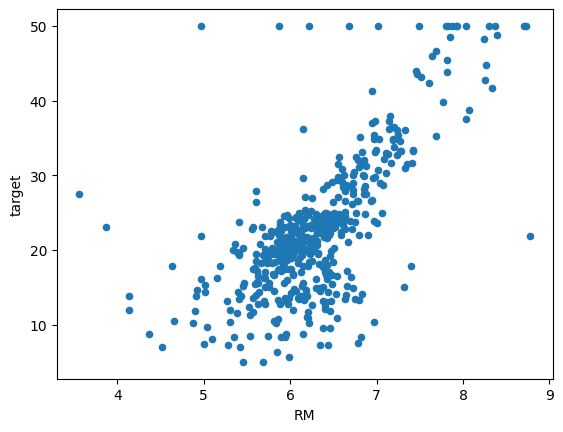

In [7]:
df.plot.scatter('RM', 'target')

In [8]:
X, y = load_boston(return_X_y=True)

# YOUR_CODE. select the values of feature 5 only (corresponding to 'RM') and assign to X 
# START_CODE 
X= X[:, 5]
# END_CODE 

X= X.reshape(-1,1) # make it 2d as for case of mutivariable

# YOUR_CODE. Apply train_test_split to X and Y to get X_train, X_test, y_train, y_test
# START_CODE 
X_train, X_test, y_train, y_test=  train_test_split(X, y)
# END_CODE 


c:\Users\crmso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [9]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
X_train[:10]

X_train.shape=  (379, 1)
y_train.shape=  (379,)


array([[6.642],
       [6.193],
       [5.854],
       [7.929],
       [6.014],
       [6.193],
       [6.004],
       [6.635],
       [5.155],
       [6.172]])

<font color = blue>
Expected output:
</font>

<br>`X_train.shape=  (379, 1)`
<br>`y_train.shape=  (379,)`

In [10]:
class Linear_Regression_1():
    def __init__(self):
        pass

    def h(self, b, w, X):
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1] == w.shape[1])

        # YOUR_CODE. Assign expression for h to h_res
        # START_CODE
        h_res = b+w * X
        # END_CODE

        return h_res

In [11]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2018)
b_check= np.random.randn()
w_check= np.random.randn(1,1)
X_check= np.random.randn(10,1)
print('b= {}, \nw= {}, \nX= \n{}'.format(b_check, w_check, X_check))
lin_reg_1 = Linear_Regression_1()
lin_reg_1.h(b_check, w_check, X_check)

b= -0.276767596147759, 
w= [[0.581851]], 
X= 
[[ 2.14839926]
 [-1.279487  ]
 [ 0.50227689]
 [ 0.8560293 ]
 [-0.14279008]
 [ 0.11007867]
 [-0.68806479]
 [ 0.43356408]
 [ 0.510221  ]
 [-0.16513097]]


array([[ 0.97328067],
       [-1.02123839],
       [ 0.01548272],
       [ 0.22131391],
       [-0.35985014],
       [-0.21271821],
       [-0.67711878],
       [-0.0244979 ],
       [ 0.02010501],
       [-0.37284922]])

<font color = blue>
Expected output:
</font>


``` 
([[ 0.97328067],
[-1.02123839],
[ 0.01548272],
[ 0.22131391],
[-0.35985014],
[-0.21271821],
[-0.67711878],
[-0.0244979 ],
[ 0.02010501],
[-0.37284922]])


In [12]:
class Linear_Regression_2():
    '''linear regression using gradient descent
    '''

    def __init__(self):
        pass

    def J(self, h, y):
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function
        '''


            # YOUR_CODE. Assign expression for J to J_res
        # START_CODE
        
        m = h.shape[0]
        err = h-y
        J_res = 1/(2*self.m ) * np.sum((err)**2)
        # END_CODE
        return J_res

In [13]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2019)
m = 10 
y_check= np.random.randn(m,1)
h_check= np.random.randn(m,1)
print('y= {}, \nh= {}'.format(y_check, h_check))
lin_reg_2 = Linear_Regression_2()
lin_reg_2.m = m 
lin_reg_2.J(h_check, y_check)

y= [[-0.21767896]
 [ 0.82145535]
 [ 1.48127781]
 [ 1.33186404]
 [-0.36186537]
 [ 0.68560883]
 [ 0.57376143]
 [ 0.28772767]
 [-0.23563426]
 [ 0.95349024]], 
h= [[-1.6896253 ]
 [-0.34494271]
 [ 0.0169049 ]
 [-0.51498352]
 [ 0.24450929]
 [-0.18931261]
 [ 2.67217242]
 [ 0.46480249]
 [ 0.84593044]
 [-0.50354158]]


0.897146515186598

<font color = blue>
Expected output:
</font>

<br>`0.897146515186598`


In [14]:
class Linear_Regression_3():


    def __init__(self, max_iter=1e5, alpha=1, eps=1e-10, verbose=0):
        pass


    def h(self, b, w, X):
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1] == w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE
        h_res = b+w * X
        # END_CODE

        return h_res


    def J_derivative(self, params, X, y):
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
        b, w = params
        assert (w.shape == (1, self.n))
        h_val = self.h(b, w, X)


        # YOUR_CODE. Assign expressions for derivates of J by b and by w  to dJ_b and dJ_w corrrespondingly
        # START_CODE

        dJ_b = 1/self.m * np.sum((h_val-y))
        dJ_w = (1/self.m) * np.sum((h_val-y) *X )
        # END_CODE

        return dJ_b, dJ_w

In [15]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2020)
m = 10 
n = 1
X_check= np.random.randn(m,n)
y_check= np.random.randn(m,1)
b_check= np.random.randn()
w_check= np.random.randn(1,n)
params = b_check,w_check 
print('X= {}, \ny= {}, \nb= {} \nw= {}'.format(X_check, y_check, b_check, w_check))

lin_reg_3 = Linear_Regression_3()
lin_reg_3.m = m 
lin_reg_3.n = n 
lin_reg_3.J_derivative(params, X_check, y_check)

X= [[-1.76884571]
 [ 0.07555227]
 [-1.1306297 ]
 [-0.65143017]
 [-0.89311563]
 [-1.27410098]
 [-0.06115443]
 [ 0.06451384]
 [ 0.41011295]
 [-0.57288249]], 
y= [[-0.80133362]
 [ 1.31203519]
 [ 1.27469887]
 [-1.2143576 ]
 [ 0.31371941]
 [-1.44482142]
 [-0.3689613 ]
 [-0.76922658]
 [ 0.3926161 ]
 [ 0.05729383]], 
b= 2.0899788404287745 
w= [[0.04197131]]


(2.1904608819958713, -1.4328426209410612)

<font color = blue>
Expected output:
</font>

`(2.1904608819958713, -1.4328426209410612)`


In [16]:
class Linear_Regression_4():
    '''
    linear regression using gradient descent
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.01,eps = 1e-10, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,n],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res = b+w * X
        # END_CODE 
        
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')   
        # YOUR_CODE. Insert the expression of J developed in Linear_Regression_2
        # START_CODE 
        m = h.shape[0]
        err = h-y
        J_res = 1/(2*self.m ) * np.sum((err)**2)
        # END_CODE 

        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
      
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
        # YOUR_CODE. Insert the expressions for derivates of J by b and by w to dJ_b and dJ_w developed in Linear_Regression_3
        # START_CODE
        dJ_b = 1/self.m * np.sum((h_val-y))
        dJ_w = (1/self.m) * np.sum((h_val-y) *X )
        # END_CODE
        
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m,self.n= X.shape # number of samples, number of features  
        y = y.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter

        while continue_iter:            
            # Do step of gradient descent    
            # YOUR_CODE. Develop one step of gradien descent 
            # START_CODE 
            dJ_b, dJ_w =  self.J_derivative(params, X, y)
            b= b - self.alpha * dJ_b 
            w= w - self.alpha * dJ_w
            params= (b, w)
            # END_CODE 
            
            # keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print ('b = {}, w= {}, J= {}'.format(b,w,self.J_hist[-1]))
            # check criteria of exit the loop (finish grad desc)
            if self.max_iter and iter_number> self.max_iter: # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number-1] - self.J_hist[iter_number])< self.eps: # if accuracy is succeeded
                continue_iter = False
            iter_number += 1
            
        # store the final params to further using 
        self.intercept_, self.coef_= params        
        return True        
 

In [17]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2021)
m = 10 
n = 1
X_check= np.random.randn(m,n)
y_check= np.random.randn(m,1)
print('X= {}, \ny= {}'.format(X_check, y_check))
lin_reg_4 = Linear_Regression_4(alpha = 1, max_iter = 5, verbose=1)
lin_reg_4.fit(X_check, y_check)

X= [[ 1.48860905]
 [ 0.67601087]
 [-0.41845137]
 [-0.80652081]
 [ 0.55587583]
 [-0.70550429]
 [ 1.13085826]
 [ 0.64500184]
 [ 0.10641374]
 [ 0.42215483]], 
y= [[ 0.12420684]
 [-0.83795346]
 [ 0.4090157 ]
 [ 0.10275122]
 [-1.90772239]
 [ 1.1002243 ]
 [-1.40232506]
 [-0.22508127]
 [-1.33620597]
 [ 0.30372151]]
Running gradient descent with alpha = 1, eps= 1e-10, max_iter= 5
b = -0.36693685587288444, w= [[-0.4217246]], J= 0.33976525493056825
b = -0.23643637277401236, w= [[-0.46886908]], J= 0.3278115023016167
b = -0.22184776004990137, w= [[-0.52721539]], J= 0.3250909705515032
b = -0.20379279582278398, w= [[-0.55396166]], J= 0.32428457786538833
b = -0.19551630227029396, w= [[-0.5697399]], J= 0.32403801171263197
b = -0.19063380881762437, w= [[-0.57831305]], J= 0.3239623872203208
b = -0.18798089094052142, w= [[-0.58309057]], J= 0.3239391853771439


True

<font color = blue>
Expected output:
</font>

```
Running gradient descent with alpha = 1, eps= 1e-10, max_iter= 5
b = -0.36693685587288444, w= [[-0.4217246]], J= 0.33976525493056825
b = -0.23643637277401236, w= [[-0.46886908]], J= 0.3278115023016167
b = -0.22184776004990137, w= [[-0.52721539]], J= 0.3250909705515032
b = -0.20379279582278398, w= [[-0.55396166]], J= 0.32428457786538833
b = -0.19551630227029396, w= [[-0.5697399]], J= 0.32403801171263197
b = -0.19063380881762437, w= [[-0.57831305]], J= 0.3239623872203208
b = -0.18798089094052142, w= [[-0.58309057]], J= 0.3239391853771439
```


In [18]:
from sklearn.metrics import r2_score
class Linear_Regression():
    '''
    linear regression using gradient descent
    '''

    def __init__(self, max_iter=1e5, alpha=0.01, eps=1e-10, verbose=0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose

    def h(self, b, w, X):
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1] == w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE
    
        h_res = b+ w * X
        # END_CODE


        return h_res

    def J(self, h, y):
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function
        '''

            # YOUR_CODE. Insert the expression of J developed in Linear_Regression_2
        # START_CODE
        m = h.shape[0]
        err = h-y
        J_res = 1/(2*self.m ) * np.sum((err)**2)
        # END_CODE

        return J_res
    def J_derivative(self, params, X, y):
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''

        b, w = params
        assert (w.shape == (1, self.n))
        h_val = self.h(b, w, X)


        # YOUR_CODE. Insert the expressions for derivates of J by b and by w to dJ_b and dJ_w developed in Linear_Regression_3
        # START_CODE
        dJ_b = (1/self.m) * np.sum((h_val-y))
        dJ_w = (1/self.m) * np.sum((h_val-y) *X )

        # END_CODE

        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array
        :return: True in case of successful fit
        '''
        if self.verbose:
            print('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m, self.n = X.shape  # number of samples, number of features
        y = y.reshape(self.m, 1)  # make it 2 d to make sure it corresponds to h_val
        b = 0  # init intercept with 0
        w = np.zeros(self.n).reshape(1, -1)  # make sure it's shape is [1,n]
        params = (b, w)

        self.J_hist = [-1]  # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True  # flag to continue next iter (grad desc step)
        iter_number = 0  # used for limit by max_iter

        while continue_iter:

            # Do step of gradient descent
            # YOUR_CODE. Develop one step of gradien descent
            # START_CODE
            dJ_b, dJ_w = self.J_derivative(params, X, y)
            b = b - self.alpha * dJ_b
            w = w - self.alpha * dJ_w
            params = (b,w)
            # END_CODE

            # keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), y))

            if self.verbose:
                print('b = {}, w= {}, J= {}'.format(b, w, self.J_hist[-1]))
            # check criteria of exit the loop (finish grad desc)
            if self.max_iter and iter_number > self.max_iter:  # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number - 1] - self.J_hist[iter_number]) < self.eps:  # if accuracy is succeeded
                continue_iter = False
            iter_number += 1

        # store the final params to further using
        self.intercept_, self.coef_ = params
        return True

    def draw_cost_changes(self):
        J_hist = self.J_hist[1:]
        plt.figure()
        plt.scatter(np.arange(0, len(J_hist)), J_hist, s=20, marker='.', c='b')
        plt.xlabel('Iterations')
        plt.ylabel('Cost function J value')
        title_str = 'Complited: {}, alpha ={}, max_iter={}, eps={}'.format(len(self.J_hist) - 2, self.alpha,
                                                                           self.max_iter, self.eps)
        # Note: len(J_hist)-2) due to first one is -1 (was not iteration), iter + 1  at the end  of the gradient loop
        plt.title(title_str)

    def predict(self, X):
        '''
        :param X - ndarray of shape (?,n)
        :return
        '''

        return self.h(self.intercept_, self.coef_, X)

    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?,n], ? - number of samples, n - number of features
        :param y_test - ndarray - 1d array
        :return R2 score of y_test and prediction for X_test
        '''
        z = self.predict(X_test)

        return (r2_score(y_test, z))

X_train.shape=  (379, 1)
y_train.shape=  (379,)
X_train= 
[[6.642]
 [6.193]
 [5.854]
 [7.929]
 [6.014]]


R2 Score = 0.6186300226099333
b: -31.769107116903758, w= [[8.68298299]]


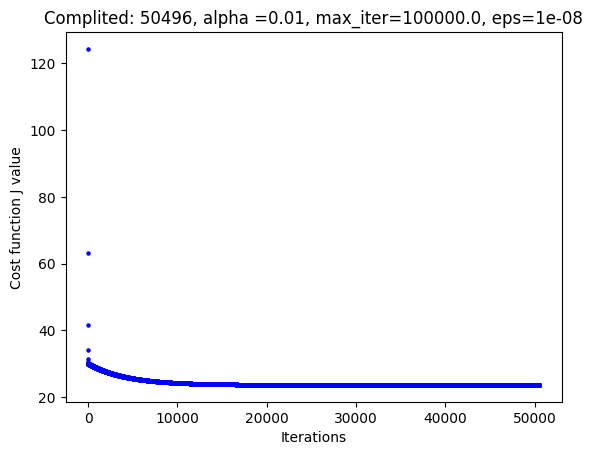

In [19]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 

print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
print ('X_train= \n{}'.format (X_train[:5,:]))
lin_reg = Linear_Regression(alpha= 0.01, verbose=0, eps=1e-8)
lin_reg.fit (X_train, y_train)
lin_reg.draw_cost_changes()
print ('R2 Score =', lin_reg.score(X_test, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

<font color = blue>
Expected output:
</font>

```
R2 Score = 0.5725111120596516
b: -32.426140228921874, w= [[8.70481894]]
```


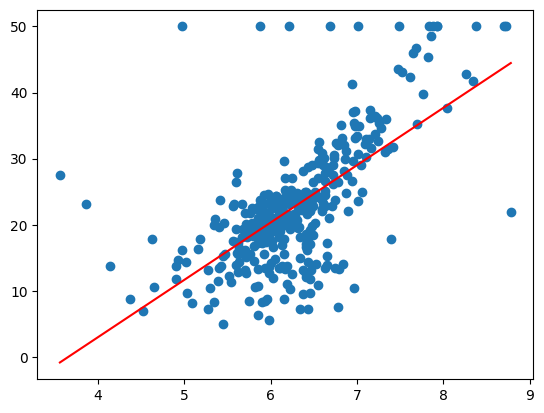

In [20]:
if X_train.shape[1]>1:
    raise Exception ('Select single feature to plot')
plt.figure()
plt.scatter(X_train, y_train)
x_line= np.array([np.min(X_train), np.max(X_train)])
z_line = lin_reg.predict(x_line.reshape(-1,1))
plt.plot(x_line, z_line, '-', c='red')

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

R2 Score = 0.6189107827369109
b: 22.65103002266472, w= [[6.03037239]]


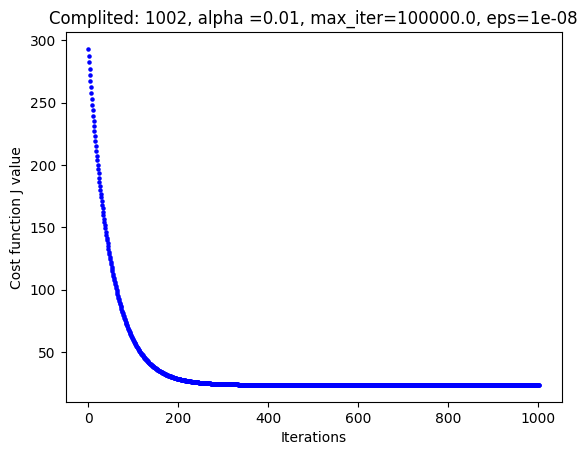

In [22]:
lin_reg = Linear_Regression(alpha= 0.01, verbose=0, eps=1e-8)
lin_reg.fit (X_train_scaled, y_train)
print ('R2 Score =',lin_reg.score(X_test_scaled, y_test))
lin_reg.draw_cost_changes()
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_))

In [23]:
np.random.seed(2021)
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

X= X[:,5].reshape(-1,1) # 5 corresponds to 'RM' 


X_train, X_test, y_train, y_test=  train_test_split(X, y, random_state=2018)
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
X_train[:5]

X_train.shape=  (379, 1)
y_train.shape=  (379,)


c:\Users\crmso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

array([[6.009],
       [5.648],
       [5.885],
       [8.297],
       [6.471]])

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

R2 training Score = 0.45545273420221755
R2 Score = 0.5691133689561655
b: 22.192080101303628, w= [[6.29517196]]


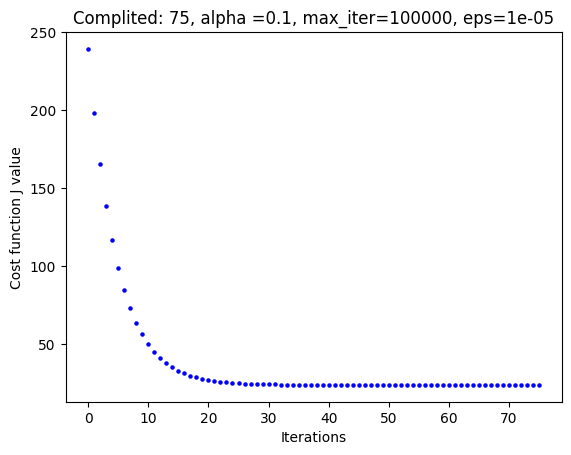

In [25]:
lin_reg = Linear_Regression(alpha= 0.1, verbose=0, eps=1e-5, max_iter=100000)
lin_reg.fit (X_train_scaled, y_train)
lin_reg.draw_cost_changes()
print ('R2 training Score =', lin_reg.score(X_train_scaled, y_train))
print ('R2 Score =', lin_reg.score(X_test_scaled, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

<font color = blue>
Expected output:
</font>

```
R2 training Score = 0.7283111795119549
R2 Score = 0.7714399743645595
b: 22.199472295514532, w= [[-6.71888107e-01  1.10023856e+00  4.11947599e-03  8.26282274e-01
  -2.22625058e+00  2.43471682e+00  2.54149326e-01 -3.29472715e+00
   2.45132782e+00 -1.99309805e+00 -1.95019870e+00  7.67364288e-01
  -4.20581658e+00]]
```


In [26]:
from sklearn.linear_model import LinearRegression
lin_reg_sklearn = LinearRegression().fit(X_train_scaled, y_train)
lin_reg_sklearn.score(X_test_scaled, y_test)

0.5692801665656613